In [60]:
#Import libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

#Import libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#Remove limits for the number of displayed columns
pd.set_option('display.max_columns', None)
#Set limits for the number of displayed rows
pd.set_option('display.max_rows', 200)

#For spliting data into test and train sets
from sklearn.model_selection import train_test_split

#For building a Linear Regression Model
from sklearn.linear_model import LinearRegression

#to check the model perfomance
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [61]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [62]:
df.shape

(1338, 7)

In [63]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

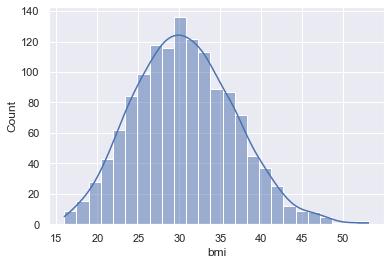

In [64]:
sns.histplot(data = df, x = 'bmi', kde = True);

In [65]:
df['bmi_logarithm'] = np.log(df['bmi'])

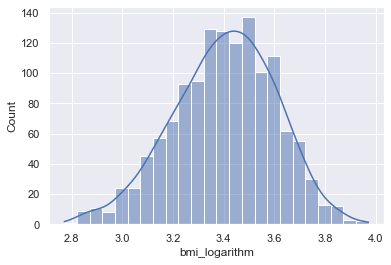

In [66]:
sns.histplot(data = df, x = 'bmi_logarithm', kde = True);

In [67]:
df.corr()

,age,bmi,children,charges,bmi_logarithm
age,1.000000,0.109272,0.042469,0.299008,0.116146
bmi,0.109272,1.000000,0.012759,0.198341,0.991023
children,0.042469,0.012759,1.000000,0.067998,0.013058
charges,0.299008,0.198341,0.067998,1.000000,0.199266
bmi_logarithm,0.116146,0.991023,0.013058,0.199266,1.000000


In [68]:
df_dummies = pd.get_dummies(df, columns = df.select_dtypes(include=['object','category']).columns.tolist(), drop_first= True)
df_dummies.head()

,age,bmi,children,charges,bmi_logarithm,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,3.328627,0,1,0,0,1
1,18,33.770,1,1725.55230,3.519573,1,0,0,1,0
2,28,33.000,3,4449.46200,3.496508,1,0,0,1,0
3,33,22.705,0,21984.47061,3.122585,1,0,1,0,0
4,32,28.880,0,3866.85520,3.363149,1,0,1,0,0


In [69]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [70]:
X= df_dummies.drop(['bmi_logarithm','charges'], axis = 1)
y = df_dummies[['charges']]
x_train, x_test, y_train,y_test = train_test_split(X, y, test_size= 0.30, random_state=1)

In [71]:
x_test.shape

(402, 8)

In [72]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [73]:
print('Number of rowsin train data =', x_train.shape[0])
print('Number of rowsin test data =', x_test.shape[0])

Number of rowsin train data = 936
Number of rowsin test data = 402


In [74]:
intercept = lin_reg_model.intercept_[0]
print('The intercept for the model is {}'.format(intercept))

The intercept for the model is -11039.238418561557


In [75]:
#function to compute adjusted R
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1-r2)* (n-1)/ (n-k-1))

#function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions)/ targets)*100

#function to compute different metric to check perfomance of a regression model
def model_perfomance_regression(model, predictors, target):
    '''
    model: regressor
    predictors: independent variables
    target: dependent variable
    '''
    
    #predicting using the independent variable
    pred = model.predict(predictors)
    
    r2 =r2_score(target, pred) #to get R-Squared
    adjr2 = adj_r2_score(predictors, target, pred) # to get adjusted R-Squared
    rmse = np.sqrt(mean_squared_error(target, pred)) # to get RMSE
    mae = mean_absolute_error(target,pred) # to get MAE
    mape = mape_score(target, pred) #to compute MAPE
    
    #creating a datafame of metrics
    df_perf = pd.DataFrame(
        {
            'RMSE': rmse,
            'MAE': mae,
            'R-Squared':r2,
            "Adj. R- Squared": adjr2,
            "MAPE": mape,

        },
        index = [0],
    )
    return df_perf

In [76]:
#Check the model perfomance on the train set
print('Training Perfomance\n')
lin_reg_model_train_perf = model_perfomance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Perfomance



C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,RMSE,MAE,R-Squared,Adj. R- Squared,MAPE
0,6039.601871,4154.405109,0.754556,0.752438,NaN


In [77]:
#Check the model perfomance on the test set
print('Test Perfomance\n')
lin_reg_model_test_perf = model_perfomance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Perfomance



C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,RMSE,MAE,R-Squared,Adj. R- Squared,MAPE
0,6063.122657,4139.932065,0.740599,0.735319,NaN


In [78]:
from sklearn.metrics import mean_absolute_error
y_pred = lin_reg_model.predict(x_test)

In [79]:
mean_absolute_error(y_test, y_pred)

4139.932064766011

In [91]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree = 2, interaction_only=True)
X_train2 = poly.fit_transform(x_train)
X_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)
y_pred = poly_clf.predict(X_test2)

#insample test
print(poly_clf.score(X_train2, y_train))

0.843127407298679


In [92]:
#out of sample
print(poly_clf.score(X_test2, y_test))

0.8385891734763353
